In [2]:
import pandas as pd
import gzip

In [3]:
#!pip3 install simplejson
#pip install simplejson

In [4]:
import simplejson as json

In [5]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

core = getDF('Video_Games.json.gz')
#core=movies.columns = ['itemID', 'title']
meta = getDF('meta_Video_Games.json.gz')

In [6]:
#Creating own rating scheme from Video_Games data, with True value for the verified columns
rawrating=core[core.verified==True][['overall','reviewerID','asin']]
rawrating.columns = ['rating','userID', 'itemID']

#rating=pd.read_csv('Video_Games.csv',header=None)
#rating.columns = ['itemID', 'userID', 'rating', 'timestamp']

In [8]:
games=meta[meta.main_cat=='Video Games'][['asin','title']]
games.columns = ['itemID', 'title']

df = pd.merge(rawrating, games, on='itemID', how='inner')[['userID','title','rating']]
#Remove 0.9% rows of duplicates
df=df.drop_duplicates(keep='last')

In [9]:
df.isnull().sum()
#df does not have any missing information

userID    0
title     0
rating    0
dtype: int64

In [10]:
print('Dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::10000, :])

Dataset shape: (1521260, 3)
-Dataset examples-
                 userID                                              title  \
0        A21ROB4YDOZA5P  BRAND NEW Learning Company Oregon Trail 5th Ed...   
15567     AYPRCAREAN28M                      WarCraft 2 Battle.net Edition   
35591     A9UIJQQ4C1ADK                                        Ms. Pac-Man   
55611     A7Q7W0TW0TT2D                                        Banjo-Tooie   
75621     AOEWOUVC8JL3V                                Super Mario Advance   
...                 ...                                                ...   
1634559   AYRP4DI2UYDAB  eForCity&reg; 5 Pack Black Rechargeable 3600mA...   
1644753   A7EJUSP1PQ4MG  Gameboy Color Pokemon/pikachu Edition Blue Bat...   
1654839   A209DZPUI9FS3                         Saitek J22G P750 Pad (USB)   
1664899  A1LCOM8TMK1SC9        The Sims 4 Get Together :  [Instant Access]   
1674938  A3A663YR1FE9HV  Gam3Gear Wired Controller Gamepad for Original...   

         rating 

## Analyze the data

In [40]:
'''
import random
random_sample = data.iloc[
    np.random.randint(
        0, 
        len(data), 
        int(len(data) / 1000)
    )
]
'''
sample= df.sample(50000)
sample

,userID,title,rating
465686,A2NT2ATX7S4JA6,Westward II: Heroes of the Frontier [Download],5.0
536194,A2KBEUB8QIDZDZ,Might &amp; Magic: Clash of Heroes - Nintendo DS,5.0
59181,A2MG0IO6MRXZI2,Zeus: Master of Olympus - PC,5.0
1449760,A7HXYGOT6SFI2,Century Accessory US AC Adapter Power Supply C...,1.0
1112221,A315S1XJJ9G163,Alien: Isolation - PlayStation 4,4.0
...,...,...,...
991634,A3T222D1PVMXYZ,Mario Kart 8 - Nintendo Wii U,5.0
402989,A2UMDKA221F32E,Pure - Playstation 3,5.0
1466368,A1W4OPY41W66GJ,Beyond: Two Souls HD - PS4 [Digital Code],5.0
1592010,A1W26D1GNNIHW2,Wanted: A Wild Western Adventure,4.0


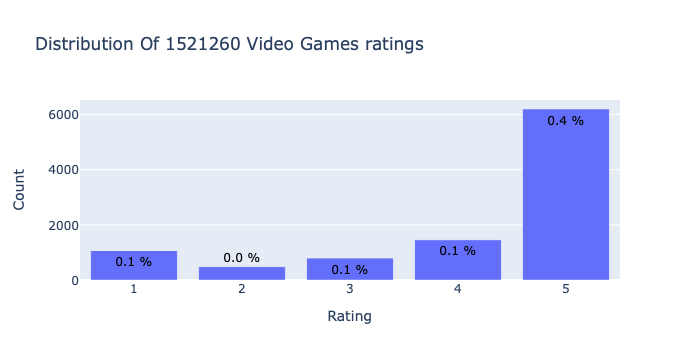

In [39]:
import plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Count the number of times each rating appears in the dataset
data = df['rating'].value_counts().sort_index(ascending=False)

# Create the histogram
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Video Games ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
# Number of ratings per Video Games
data = df.groupby('title')['rating'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Video Games',
                   xaxis = dict(title = 'Number of Ratings Per Video Games'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
# Number of ratings per user
data = df.groupby('userID')['rating'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0, size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

,userID,title,rating
804955,A1G3NW5D9QWTHJ,CTA Digital PS Vita Travel EVA Protective Case,5.0
1014292,A1ZZGDH0MKEQR8,Polk Audio Melee Headphone - Blue - Xbox/Xbox 360,1.0
438496,A367OB1E03A8QM,Logitech Wii Speed Force Wireless Wheel,5.0
598425,A30QQD7422N9ZH,Sony Playstation 3 160GB System,5.0
1305701,A1N38RLQLSAJRZ,Forza Motorsport 6 - Xbox One,3.0
...,...,...,...
1274435,A3PUMASX0K6X01,5 Pair/10 Pcs Replacement Silicone Analog Cont...,1.0
1191433,AOPSH1BA8Q35Q,Bloodborne,4.0
1275728,A35082T8JNHY6Y,USPRO&reg; PS3 Bluetooth 6 Axis Wireless Game ...,5.0
631729,A1PVN4V1ZB6DS5,Play &amp; Charge Kit Cable Only for Xbox 360,3.0


In [41]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sample[['userID', 'title', 'rating']], reader=reader)
#data.split(n_folds=5)

In [42]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3286  1.3342  1.3258  1.3295  0.0035  
MAE (testset)     1.0414  1.0485  1.0428  1.0442  0.0031  
Fit time          2.57    2.63    2.50    2.57    0.05    
Test time         0.16    0.12    0.11    0.13    0.02    


{'test_rmse': array([1.32862117, 1.33420619, 1.32575006]),
 'test_mae': array([1.04139689, 1.04852513, 1.04280964]),
 'fit_time': (2.56613826751709, 2.6321768760681152, 2.50254225730896),
 'test_time': (0.15668296813964844, 0.1150047779083252, 0.1125030517578125)}

In [44]:
#Gridsearch for svd
from surprise import Dataset,SVD,NormalPredictor
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors': [50,100,150,200],'n_epochs': [20,30,50], 'lr_all': [0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
params = gs.best_params['rmse']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])
cross_validate(svdtuned, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3300  1.3459  1.3143  1.3301  0.0129  
MAE (testset)     1.0438  1.0506  1.0312  1.0419  0.0081  
Fit time          2.39    2.43    2.44    2.42    0.02    
Test time         0.11    0.11    1.83    0.68    0.81    


{'test_rmse': array([1.32998949, 1.34589263, 1.31432721]),
 'test_mae': array([1.04384559, 1.05064628, 1.03120584]),
 'fit_time': (2.3944718837738037, 2.4290239810943604, 2.4380738735198975),
 'test_time': (0.11121511459350586, 0.11364293098449707, 1.8264400959014893)}

In [ ]:
# https://towardsdatascience.com/svd-where-model-tuning-goes-wrong-61c269402919

## Benchmarking

In [45]:
from surprise import SVD
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNBaseline
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), BaselineOnly(), CoClustering()]:
    
    print("Testing {}".format(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Testing <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fc3c5369280>
Testing <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fc3c53693d0>
Testing <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7fc3c5369130>
Testing <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7fc3c5369340>
Testing <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7fc3c53696d0>
Testing <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7fc3c5369730>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Testing <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7fc3c5369790>
Estimating biases using als...
Estimating biases using als

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.330102,3.943097,0.135242
KNNBaseline,1.330162,86.246688,0.968804
SVD,1.330399,3.157734,0.117789
BaselineOnly,1.330424,0.355027,0.116149
SlopeOne,1.365035,6.808972,0.154644
CoClustering,1.367413,5.864425,0.095534
NMF,1.376286,6.396784,0.122185
NormalPredictor,1.727325,0.067252,0.145870


## Interpretation

> One example of the video game and its neighbours
> A possible graph?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Taking randomly just 100 movies to avoid overcrowding the plot
idxs = np.random.choice(len(principalDf), 100, replace=False) 
idxs = list(range(100))

# Represent the movies according to the principal components
X = principalDf.iloc[idxs]['principal component 1'].values
Y = principalDf.iloc[idxs]['principal component 2'].values

# Plot the movies
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip([trainset.to_raw_iid(idx) for idx in idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## Content-based